In [3]:
from soundfile import read
import os, glob
from tqdm import tqdm
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [4]:
folder_path = "datasets/KAIST/0dB/clean/"
clean_file_list = glob.glob("../../../" + folder_path + "*")
# clean_file_list = glob.glob("/mnt/aiter/kkr/datasets/KAIST/0dB/clean")

In [5]:
lengths = []            
for file_to_read in tqdm(clean_file_list):
    wav_file, sr = read(file_to_read)
    lengths.append(len(wav_file))

100%|██████████| 7396/7396 [00:01<00:00, 6919.40it/s]


In [6]:
sr = 16000
lengths = np.array(lengths)
lengths_second = lengths / sr

In [7]:
print(lengths)
print(lengths_second)

lengths_second

[62768 49871 16016 ... 54128 39216 31504]
[3.923     3.1169375 1.001     ... 3.383     2.451     1.969    ]


array([3.923    , 3.1169375, 1.001    , ..., 3.383    , 2.451    ,
       1.969    ])

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
std_scaler = StandardScaler()
mm_scaler = MinMaxScaler()

In [11]:
print(lengths_second.shape)
dt = lengths_second.reshape(-1, 1)
print(dt.shape)

std_scaler.fit(dt)
std = std_scaler.transform(dt)

mm = mm_scaler.fit_transform(dt)

(7396,)
(7396, 1)


In [12]:
std

array([[ 1.19746939],
       [ 0.41383925],
       [-1.64321266],
       ...,
       [ 0.67249735],
       [-0.23356551],
       [-0.70215167]])

In [26]:
mm.shape
mm = mm.squeeze()

In [27]:
mm

array([0.374345  , 0.28986979, 0.06811989, ..., 0.31775309, 0.22007965,
       0.16956613])

In [30]:
mm[mm.argmax()]

0.9999999999999998

In [41]:
temp = lengths_second > 4
temp2 = lengths_second > 3
temp3 = lengths_second > 2
temp4 = lengths_second > 1

In [42]:
print(sum(temp2))
print(sum(temp3))
print(sum(temp4))


2595
5437
7218


In [43]:
np.mean(lengths_second)

2.69125160559762

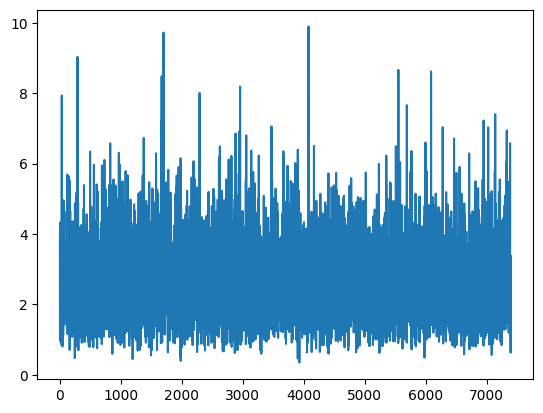

In [19]:
plt.plot(lengths_second)
plt.show()

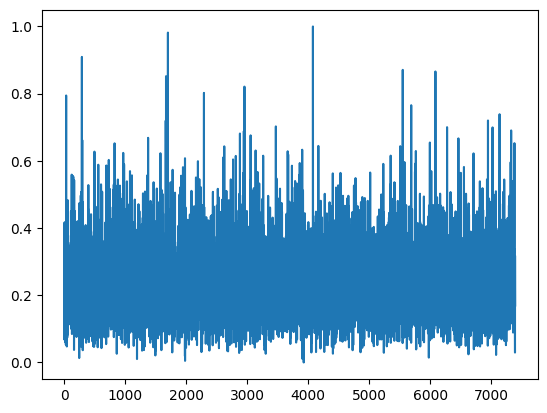

In [31]:
plt.plot(mm)
plt.show()